In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def loading_data():
    # reading data
    train_set = pd.read_csv('sample_data/california_housing_train.csv')
    test_set = pd.read_csv('sample_data/california_housing_test.csv')

    # data preprocessing
    train_y = train_set["median_house_value"]
    del train_set["median_house_value"]
    del train_set["longitude"]
    del train_set["latitude"]

    test_y = test_set["median_house_value"]
    del test_set["median_house_value"]
    del test_set["longitude"]
    del test_set["latitude"]

    # normalising data
    train_set_normal = (train_set-train_set.mean())/train_set.std()
    test_set_normal = (test_set-test_set.mean())/test_set.std()

    # converting data set to array
    train_set = train_set_normal.to_numpy()
    test_set = test_set_normal.to_numpy()

    train_y = train_y.to_numpy()
    test_y = test_y.to_numpy()

    return (train_set, train_y), (test_set, test_y)

In [3]:
(train_X, train_y), (test_X, test_y) = loading_data()

In [4]:
class LinearRegressor(object):
    def __init__(self):
        pass

    def fit_SGD(self, train_X, train_y, epochs=10, lr=0.01):
        self.num_datapoints = train_X.shape[0]
        self.num_features = train_X.shape[1]

        self.weight = np.random.randn(self.num_features, 1)
        self.bias = np.random.randn()

        self.train_loss = []  # contains loss of each epoch

        self.train_loss.append(self.train_test_loss(
            data_X=train_X, data_y=train_y))

        for j in range(epochs):

            nabla_w, nabla_b = self.update_parameters(train_X, train_y)

            self.weight = self.weight - (lr/self.num_datapoints)*(nabla_w)
            self.bias = self.bias - (lr/self.num_datapoints)*(nabla_b)

            self.train_loss.append(self.train_test_loss
                                   (data_X=train_X, data_y=train_y))

        self.plot_loss()

    def fit_NE(self, train_X, train_y):
        self. weight = np.linalg.pinv(
            (train_X.T) @ train_X) @ ((train_X.T) @ train_y)

    def update_parameters(self, X, y):
        delta = np.matmul(X, self.weight) + self.bias
        delta = delta.reshape(-1)  # making shape of y and delta same
        delta = delta - y

        nabla_b = np.sum(delta)  # same as dot product with ones vector
        # reshaping it as a column vector
        nabla_w = np.matmul(delta, X).reshape(-1, 1)

        return nabla_w, nabla_b

    def train_test_loss(self, data_X, data_y):
        predicted_output = self.prediction(data_X)
        return self.loss_function(predicted_output, data_y)

    def prediction(self, data):
        return np.matmul(data, self.weight) + self.bias

    def loss_function(self, predicted_output, acutal_output):
        # Mean Square Error
        predicted_output = predicted_output.reshape(-1)
        return (1.0/(2*self.num_datapoints))*(np.linalg.norm(predicted_output - acutal_output))

    def plot_loss(self):
        x = np.arange(0, len(self.train_loss), 1)
        plt.plot(x, self.train_loss, color="teal")
        plt.show()

    def predict(self, test_X, test_y):
        predicted_output = self.prediction(test_X).reshape(-1)
        self.r2score(predicted_output, test_y)

    def r2score(self, predicted_output, actual_output):
        rss = np.linalg.norm(actual_output - predicted_output)**2
        tss = np.linalg.norm(actual_output - np.mean(actual_output))**2

        print(f"r2score: {(1-(rss/tss))*100}")

In [5]:
lig = LinearRegressor()

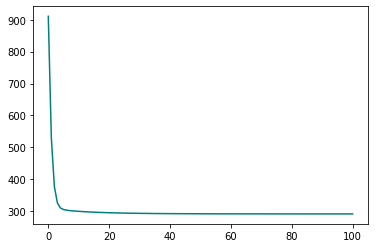

In [6]:
lig.fit_SGD(train_X, train_y, epochs=100, lr=0.5)

In [7]:
lig.predict(test_X, test_y)

r2score: 54.4758007984627


In [8]:
lig.fit_NE(train_X, train_y)

In [9]:
lig.predict(test_X, test_y)

r2score: 54.46683334777153


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
sk_lig = LinearRegression()
sk_lig.fit(train_X, train_y)
print(sk_lig.score(test_X, test_y)*100)

54.466833347771406
